In [2]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
import seaborn as sns

#Import API Key
from config import key
import os

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Generate lists for holding lat and long, and cities. 
lat_lngs = []
cities = []

#Create random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Iterate through list of cities to identity nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If it's a unique city, then add it to a ciies list
    
    if city not in cities:
        cities.append(city)
        
#Print the count of cities to confirm number of cities in database
len(cities)

595

In [4]:
#Perform API calls to check on temp, humidity, cloudiness, and wind speed in each city

#Use URL for weather map API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Build base URL
base_url = f"{url}appid={key}&units={units}&q="

#Create empty lists to hold weather and location data
clouds = []
winds = []
temp = []
humidity = []
country = []
lat = []
lng = []
city_list = []
date = [] 

#Start printing data
print("Gathering Data...")
print ("-----------------------------------------")
counter = 0
set_counter = 1

#Iterate through list of cities and perform request for data on each location
for city in cities:
    
    if counter > 10:
        counter = 1
        set_counter += 1
        
    else:
        counter += 1
    
    try:
        city_url = f'{base_url}{city.replace(" ","+")}'
        response = requests.get(city_url)
        print(f"Processing Record Number {counter} of Set Number {set_counter} | City of {city}")
        print(city_url)
        
        #Generate data for each weather element       
        data = response.json()
        time.sleep(1)
        clouds.append(data["clouds"]["all"])
        winds.append(data["wind"]["speed"])
        temp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        country.append(data["sys"]["country"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        date.append(data["dt"])
        city_list.append(city)
        
    except:
        print("City not found. Skipping request.")
        
print("-------------\nData API Response Complete\n-------------------")
            

Gathering Data...
-----------------------------------------
Processing Record Number 1 of Set Number 1 | City of pevek
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=pevek
Processing Record Number 2 of Set Number 1 | City of esperance
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=esperance
Processing Record Number 3 of Set Number 1 | City of butaritari
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=butaritari
Processing Record Number 4 of Set Number 1 | City of puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=puerto+ayora
Processing Record Number 5 of Set Number 1 | City of arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=arraial+do+cabo
Processing Record Number 6 of Set Number 1 | City of figea

Processing Record Number 4 of Set Number 5 | City of yuzhno-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=yuzhno-yeniseyskiy
City not found. Skipping request.
Processing Record Number 5 of Set Number 5 | City of lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=lavrentiya
Processing Record Number 6 of Set Number 5 | City of kavieng
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=kavieng
Processing Record Number 7 of Set Number 5 | City of sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=sobolevo
Processing Record Number 8 of Set Number 5 | City of port alfred
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=port+alfred
Processing Record Number 9 of Set Number 5 | City of buala
http://api.openweat

Processing Record Number 7 of Set Number 9 | City of sechura
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=sechura
Processing Record Number 8 of Set Number 9 | City of taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=taolanaro
City not found. Skipping request.
Processing Record Number 9 of Set Number 9 | City of phek
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=phek
Processing Record Number 10 of Set Number 9 | City of east london
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=east+london
Processing Record Number 11 of Set Number 9 | City of phan thiet
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=phan+thiet
Processing Record Number 1 of Set Number 10 | City of voiron
http://api.openweathermap.org/data/2.5/we

Processing Record Number 10 of Set Number 13 | City of tateyama
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=tateyama
Processing Record Number 11 of Set Number 13 | City of bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=bredasdorp
Processing Record Number 1 of Set Number 14 | City of batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=batagay-alyta
Processing Record Number 2 of Set Number 14 | City of beloha
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=beloha
Processing Record Number 3 of Set Number 14 | City of belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=belushya+guba
City not found. Skipping request.
Processing Record Number 4 of Set Number 14 | City of iskateley
http://api.open

Processing Record Number 2 of Set Number 18 | City of saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=saint-philippe
Processing Record Number 3 of Set Number 18 | City of alofi
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=alofi
Processing Record Number 4 of Set Number 18 | City of clyde river
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=clyde+river
Processing Record Number 5 of Set Number 18 | City of pisco
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=pisco
Processing Record Number 6 of Set Number 18 | City of nizhniy tsasuchey
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=nizhniy+tsasuchey
Processing Record Number 7 of Set Number 18 | City of san quintin
http://api.openweathermap.org/data/2.5/weathe

Processing Record Number 5 of Set Number 22 | City of saryshagan
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=saryshagan
City not found. Skipping request.
Processing Record Number 6 of Set Number 22 | City of kedrovyy
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=kedrovyy
Processing Record Number 7 of Set Number 22 | City of lasa
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=lasa
Processing Record Number 8 of Set Number 22 | City of nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=nikolskoye
Processing Record Number 9 of Set Number 22 | City of myitkyina
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=myitkyina
Processing Record Number 10 of Set Number 22 | City of nara
http://api.openweathermap.org/data/2.5/

Processing Record Number 8 of Set Number 26 | City of harper
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=harper
Processing Record Number 9 of Set Number 26 | City of emet
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=emet
Processing Record Number 10 of Set Number 26 | City of hambantota
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=hambantota
Processing Record Number 11 of Set Number 26 | City of tiruchchendur
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=tiruchchendur
Processing Record Number 1 of Set Number 27 | City of apache junction
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=apache+junction
Processing Record Number 2 of Set Number 27 | City of ramhormoz
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record Number 11 of Set Number 30 | City of nokaneng
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=nokaneng
Processing Record Number 1 of Set Number 31 | City of bereda
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=bereda
Processing Record Number 2 of Set Number 31 | City of lorengau
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=lorengau
Processing Record Number 3 of Set Number 31 | City of ngunguru
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=ngunguru
Processing Record Number 4 of Set Number 31 | City of petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=petropavlovsk-kamchatskiy
Processing Record Number 5 of Set Number 31 | City of lumut
http://api.openweathermap.org/data/2.5/weath

Processing Record Number 3 of Set Number 35 | City of necochea
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=necochea
Processing Record Number 4 of Set Number 35 | City of doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=doctor+pedro+p.+pena
City not found. Skipping request.
Processing Record Number 5 of Set Number 35 | City of leshukonskoye
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=leshukonskoye
Processing Record Number 6 of Set Number 35 | City of letnik
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=letnik
Processing Record Number 7 of Set Number 35 | City of ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=ahuimanu
Processing Record Number 8 of Set Number 35 | City of duncan
http://api

Processing Record Number 5 of Set Number 39 | City of vilhena
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=vilhena
Processing Record Number 6 of Set Number 39 | City of faanui
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=faanui
Processing Record Number 7 of Set Number 39 | City of cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=cabo+san+lucas
Processing Record Number 8 of Set Number 39 | City of palma di montechiaro
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=palma+di+montechiaro
Processing Record Number 9 of Set Number 39 | City of monroe
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=monroe
Processing Record Number 10 of Set Number 39 | City of ancud
http://api.openweathermap.org/data/2.5/weather?a

Processing Record Number 8 of Set Number 43 | City of wahran
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=wahran
City not found. Skipping request.
Processing Record Number 9 of Set Number 43 | City of tynda
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=tynda
Processing Record Number 10 of Set Number 43 | City of indramayu
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=indramayu
Processing Record Number 11 of Set Number 43 | City of buenaventura
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=buenaventura
Processing Record Number 1 of Set Number 44 | City of bacolod
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=bacolod
Processing Record Number 2 of Set Number 44 | City of cumaribo
http://api.openweathermap.org/data/2.5

City not found. Skipping request.
Processing Record Number 11 of Set Number 47 | City of fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=fort+nelson
Processing Record Number 1 of Set Number 48 | City of yatou
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=yatou
Processing Record Number 2 of Set Number 48 | City of surovikino
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=surovikino
Processing Record Number 3 of Set Number 48 | City of vila velha
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=vila+velha
Processing Record Number 4 of Set Number 48 | City of samatau
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=samatau
City not found. Skipping request.
Processing Record Number 5 of Set Number 48 | City of inhamb

Processing Record Number 4 of Set Number 52 | City of bom jesus
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=bom+jesus
Processing Record Number 5 of Set Number 52 | City of korsakov
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=korsakov
Processing Record Number 6 of Set Number 52 | City of yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=yerbogachen
Processing Record Number 7 of Set Number 52 | City of umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=umm+lajj
Processing Record Number 8 of Set Number 52 | City of dodola
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=dodola
Processing Record Number 9 of Set Number 52 | City of aksarka
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641

Convert city weather records to raw dataframe.

In [5]:
#print(cloudiness)
print(len(city_list))
print(len(clouds))
print(len(country))   
print(len(date))         
print(len(humidity))   
print(len(lat))    
print(len(lng))       
print(len(temp))    
print(len(winds))

545
545
545
545
545
545
545
545
545


In [6]:
weatherpy= {"City": city_list, "Country": country, "Date": date, "Lat": lat, "Long": lng, "Max Temp": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": winds}

weatherpy_df = pd.DataFrame(weatherpy)

weatherpy_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,pevek,RU,1619032925,69.7008,170.3133,-6.24,68,12,7.97
1,esperance,AU,1619032655,-33.8667,121.9000,14.00,94,90,1.54
2,butaritari,KI,1619032928,3.0707,172.7902,27.83,78,100,7.96
3,puerto ayora,EC,1619032817,-0.7393,-90.3518,27.00,78,75,5.14
4,arraial do cabo,BR,1619032931,-22.9661,-42.0278,23.00,83,40,4.12


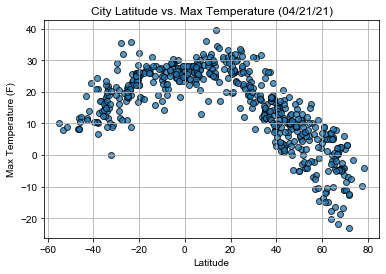

In [7]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Max Temp'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Max Temperature.png")

plt.show()


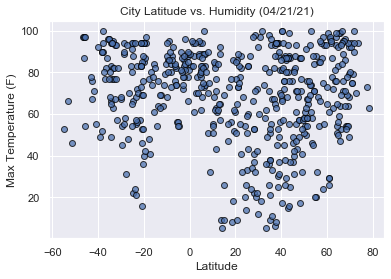

In [8]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Humidity'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Humidity.png")

plt.show()

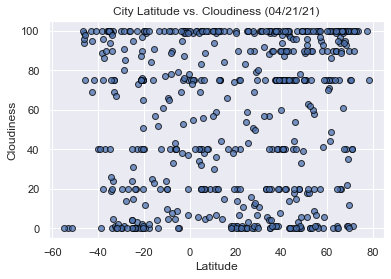

In [9]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Cloudiness'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Cloudiness.png")

plt.show()

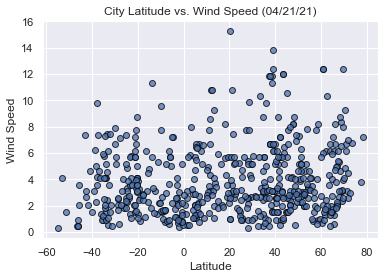

In [10]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Wind Speed'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Wind Speed.png")

plt.show()

In [11]:
northern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"]>=0)]
southern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"]<=0)]

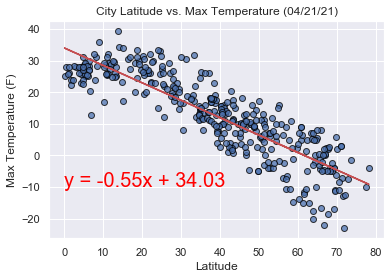

In [26]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Max Temp'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Max Temp'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(0, -10), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Max Temperature - Nothern Hemisphere.png")

plt.show()


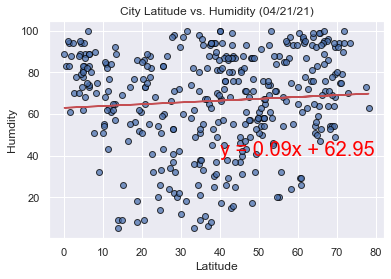

In [27]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Humidity'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Humidity'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(40, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Humidity - Nothern Hemisphere.png")

plt.show()

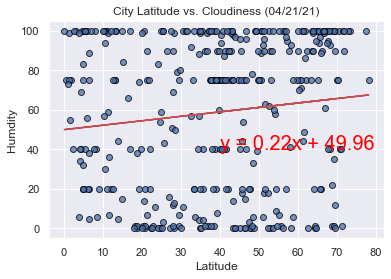

In [28]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Cloudiness'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Cloudiness'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(40, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Cloudiness - Nothern Hemisphere.png")

plt.show()

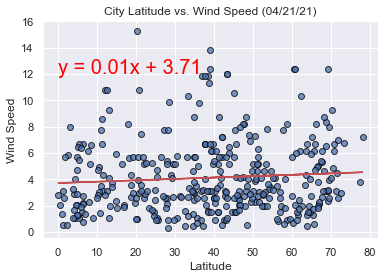

In [29]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Wind Speed'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Wind Speed'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(0, 12), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Wind Speed - Nothern Hemisphere.png")

plt.show()

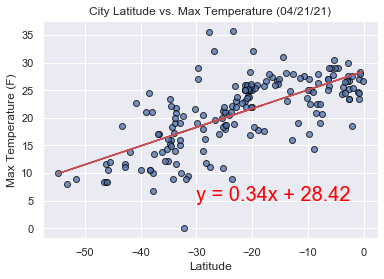

In [30]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Max Temp'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Max Temp'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-30, 5), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Max Temperature - Southern Hemisphere.png")

plt.show()


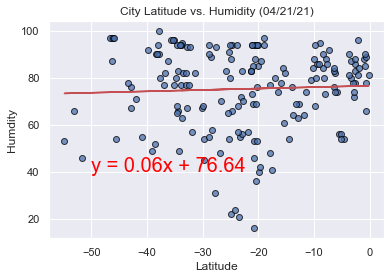

In [32]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Humidity'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Humidity'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-50, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Humidity - Southern Hemisphere.png")

plt.show()

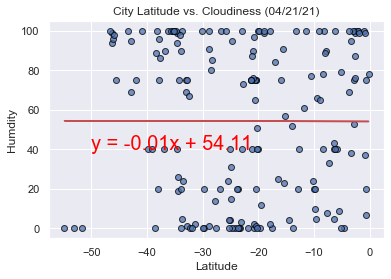

In [34]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Cloudiness'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Cloudiness'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-50, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Cloudiness - Southern Hemisphere.png")

plt.show()

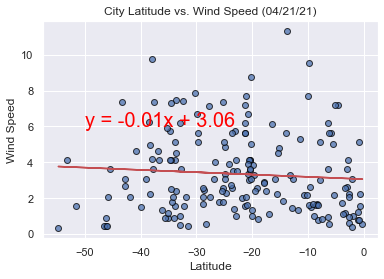

In [36]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Wind Speed'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Wind Speed'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-50, 6), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Wind Speed - Southern Hemisphere.png")

plt.show()

In [37]:
weatherpy_df.to_csv("../cities_weather.csv")